# Project: Investigate a Dataset (The Movie Database - TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='#questions'>Questions I am going to ask and find</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Analysis Shortcoming and Data limiations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have selected TMDB Movie dataset which contains over 10,000 movies including user rating, authors, budget and revenue. In the following I will descirbe my understnding about columns of the table. 
 - `id` - Unique id of each movie
 - `imdb_id` - Unique ID to access the movie from IMDB (https://www.imdb.com/title/tt0369610/)
 - `popularity` - Popularity range from 0 to 33.
 - `budget` - Estimated budget in dollars (precise to extracted date)
 - `revenue` -  Revenue in dollars (precise to extracted date)
 - `original_title` - Title of the movie
 - `cast` - Top actors/actresses/cast
 - `homepage` - web home page address
 - `director` - director name
 - `tagline` - short text like search keyword
 - `keywords` - movie keywords, need to split by |
 - `overview` - Short description/storyline
 - `runtime` - duration of the movie
 - `genres` - genres need to split by |
 - `production_companies` - productioners, need to split by |
 - `release_date` - Released date
 - `vote_count` - integer
 - `vote_average` - average vote
 - `budget_adj, revenue_adj` - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars

I would like to investigate some patterns associated with `genres, revenues, budget and profit`. Timeline such as `release_year` grouping is mostly important to do this task. After reviewing the dateset, we can clearly see `NaN/NULL` values exist. I am dropping related NULL rows. Therefore, I decided to work with seperate dataset for each Research questions to preserve original one(Maybe, i will need some of columns to investigate). So, I am transforming main `dataframe` to `sub-dataframes`. For example, `df_q1(dataframe for research question 1)` will be created from main `df(dataframe)`,. `df_q2` - dataframe for research question 2 ans so on... Overall, you can consider `df_qN`s are cleaned dataset. 
 
<a id='questions'></a> 
 ### Questions I am going to ask and find. 
<ul>
<li><a href="#q1">Which genres are most popular from year to year? </a></li>
<li><a href='#q2'>What kinds of properties are associated with movies that have high revenues?</a></li>
<li><a href="#q3">Which movies made the most profit, yearly?</a></li>
</ul>

In [1]:
import pandas as pd # CSV reader pandas library
import matplotlib.pyplot as plt # Matplotlib for styling
import seaborn as sns # Seaborn data visualization library
import matplotlib.pyplot as plt # Matplotlib for styling
import matplotlib.ticker as ticker #tick locators and formatters
import numpy as np # Numpy library
#to draw the graphs inline
%matplotlib inline 
pd.options.mode.chained_assignment = None

<a id='wrangling'></a>
## Data Wrangling


### General Properties
In the following several lines, I am reviewing the given dataset by printing `several rows`, `all columns`, `desciribe`, `info`, `hist()` and `null_values checking` for the reason of determining properties and relationships.

In [2]:
### Importing city_list.csv file into city_lists file object
df = pd.read_csv('./dataset/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# printing columns
print('Columns : ', df.columns)

# To print the size of the table
print('Size of the table: ', df.shape)

Columns :  Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')
Size of the table:  (10866, 21)


 ##### Some of my reviews for necessary columns
 - It seems from below that  `id`, `budget_adj` and `revenue_adj` don't neccessary for my Research Questions. 
 - It seems from below that more thean `50%` of the `budget` and `revenue` equals to `zero`.
 - It seems from below that `popularity` value ranges from 0 to 33
 - It seems from below that there exists `runtime` of the movies equal to `zero`

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It seems from below that `homepage`, `tagline` and `keywords` columns doesn't seem usefull for further analysis. So, I will not consider them in my `sub-dataframes`. Worth to note that, length of the column `genres` is not equal to `10866`. So, it means I have to consider `NULL` values and drop them.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# to see wich columns have, how many NULL values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# count zero values on `budget`, `revenue` and `popularity`
print('Zero values of Budget: ', df.query('budget == 0').count()['budget'])
print('Zero values of Revenue: ', df.query('revenue == 0').count()['revenue'])

Zero values of Budget:  5696
Zero values of Revenue:  6016


In [9]:
# to check if popularity ranges mostly > 0 and less than 10
df.query('popularity < 10')['popularity']

4        9.335014
5        9.110700
6        8.654359
7        7.667400
8        7.404165
           ...   
10861    0.080598
10862    0.065543
10863    0.065141
10864    0.064317
10865    0.035919
Name: popularity, Length: 10855, dtype: float64

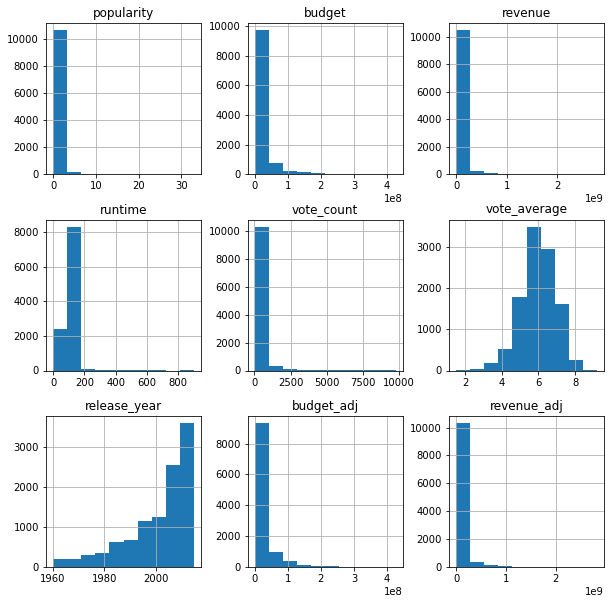

In [10]:
# to plot the histogram for all numeric columns
df.iloc[:, 1:].hist(figsize=(10,10));

Data is described according to the above histograms. Which means, only visible value ranges is considered. We will check more exact values in the following. 
 -  It seems from below that `popularity` table's almost all values ranges from 0 to 10. 
 - `Budget` table ranges from 0 million to 300 million. Currency name is not available, but should be dollar I think.
 - `Revenue` table ranges from 0 billion to 1 billion. Currency name is not available, but should be dollar I think.
 - `Runtime` ranges mostly from 0 to 200
 - `vote_average` seems almost symmetric
 - and so on ...

In [11]:
# to determine, if release_year have missing value
null_data_release_year = df[df['release_year'].isnull()]
null_data_release_year.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [12]:
# to determine, if release_year have missing value
null_data_genres = df[df['genres'].isnull()]
# null_data_genres.shape
null_data_genres.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0


### Data Cleaning (Dropping, unique, merging, grouping, duplicate values)

Here, I decided to remove values of `budget` and `revenue` that equals to `0` at the same time. However, I will keep rows if one of them is not equals to `zero` 

In [13]:
# deleteing rows when budget and revenue euqals to zero
indexes_to_delete= df.query('budget == 0 and revenue == 0').index
df.drop(indexes_to_delete, inplace = True)
df.shape

(6165, 21)

Here, I will asses mean value of budget when it is equal to `0`; However, I decided to give budget value to its revenue for avoiding big difference in values. I mean, I thought movie's profit at least should equal to its `budget`. )

In [14]:
# Replacing 0 budget values with mean of all expenditure
df['budget'] = df['budget'].replace(0, df['budget'].mean())

# Assesing budget value to revenue when it is equal to zero
for index, row in df.iterrows():
    if df['revenue'][index] == 0:
        df['revenue'][index] = df['budget'][index]

In [15]:
# Chech if zero values on `budget` and `revenue` exists
print('Zero values of Budget: ', df.query('budget == 0').count()['budget'])
print('Zero values of Revenue: ', df.query('revenue == 0').count()['revenue'])

Zero values of Budget:  0
Zero values of Revenue:  0


To answer Q1(Question - 1), I decided to transform given dataframe to `df_q1` which will be comfortable to draw barplot. The answer of the question 1 can be found in `release_year` and `genres`.
Therefore, I did some cleaning process as following to above mentioned columns. 

In [16]:
# to select non-null genres with release_year for Question 1 (Q1)
df_q1 = df.dropna(subset=['genres'])[['release_year','genres']]

# To determine the non-null values lengh
print('Lenght of Q1 dataset : ', len(df_q1))
df_q1.head(4)

Lenght of Q1 dataset :  6164


,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
1,2015,Action|Adventure|Science Fiction|Thriller
2,2015,Adventure|Science Fiction|Thriller
3,2015,Action|Adventure|Science Fiction|Fantasy


In [17]:
# Finding the unique values of the year
df_q1['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [18]:
# Grouping all other genres in the same year by using `|` character
df_q1['genres']= df_q1.groupby('release_year')['genres'].transform(lambda x: '|'.join(x))
df_q1.head()

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller|Acti...
1,2015,Action|Adventure|Science Fiction|Thriller|Acti...
2,2015,Action|Adventure|Science Fiction|Thriller|Acti...
3,2015,Action|Adventure|Science Fiction|Thriller|Acti...
4,2015,Action|Adventure|Science Fiction|Thriller|Acti...


In [19]:
#droping duplicate values after merging dataset of `df_q1`
df_q1 = df_q1.drop_duplicates()

# sorting values to draw barplot in ascending order
df_q1 = df_q1.sort_values(by=['release_year'])

In [20]:
# to check if release_year is sorted
df_q1.head(4)

,release_year,genres
10141,1960,Drama|Horror|Thriller|Action|Adventure|Western...
10110,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...
9849,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...
10438,1963,Action|Thriller|Adventure|Horror|Comedy|Myster...


In [21]:
# to check if genres is merged correctly by manually checking original dataframe
df_q1['genres'][10141]

'Drama|Horror|Thriller|Action|Adventure|Western|Action|Drama|History|Comedy|Drama|Romance|Thriller|Adventure|Fantasy|Science Fiction|Romance|Comedy|Drama|Romance|Horror|Thriller|Comedy|Horror|Science Fiction|Comedy|Family|Comedy|Romance'

In [22]:
# shape should be equal to df_q1['release_year'].unique() value, manually checked
df_q1.shape

(56, 2)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1 (Which genres are most popular from year to year?)
   

#### Importance of the Research Question 1
> By analayzing the question, we can explore which genres are in demand from year to year as well as overall. I am also going to detemine top 2 genres every year to know more insights. 

>To explore, I am going to work with genres and release_year columns.
>To Explore Question 1 visually, I have to split genres by `|` character and should create columns to each genre with argument `count` values. 

>Mainly, I am planning to use barplot and piechart in my statistics result.

Function `get_genre_frequency` splits the genres and return it as `numpy.ndarray` like tuple. So, it returns `unique` - unique genre name and `counts` - counts the number of its appearance 

In [23]:
def get_genre_frequency(genres):
    array = np.array(genres.split('|'))
    (unique, counts) = np.unique(array, return_counts=True)
    return np.asarray((unique, counts)).T

Function `create_each_genre_columns`. Here, I am transferring all genres values into columns which is resulted from `get_genre_frequency` function.

In [24]:
def create_each_genre_columns(np_genre_frequencies, df, ind):
    for unique, counts in np_genre_frequencies:
        if unique not in df.columns:
            df[unique] = 0
        df[unique][ind] = counts
    return df

Function  `create_the_most_popular_genre_columns` is created to visualize the winner of the genres from year to year.

In [25]:
def create_the_most_popular_genre_columns(np_genre_frequencies, df, ind):
    df['popular_genre_count'] = df.iloc[:, 4:].max(axis=1)
    df['popular_genre_name'] = df.iloc[:, 4:].idxmax(axis=1)
    return df

Here I am running above 3 functions to create `df_q1` by considering index.

In [26]:
df_q1['popular_genre_name'] = 'UNKNOWN'
df_q1['popular_genre_count'] = 0
for ind in df_q1.index:   
    np_genre_frequencies = get_genre_frequency(df_q1['genres'][ind])
    df_q1 = create_each_genre_columns(np_genre_frequencies, df_q1, ind)
    df_q1 = create_the_most_popular_genre_columns(np_genre_frequencies, df_q1, ind)

df_q1.head(10)

,release_year,genres,popular_genre_name,popular_genre_count,Action,Adventure,Comedy,Drama,Family,Fantasy,...,Thriller,Western,Animation,Crime,Music,War,Foreign,Mystery,Documentary,TV Movie
10141,1960,Drama|Horror|Thriller|Action|Adventure|Western...,Comedy,5,2,2,5,4,1,1,...,3,1,0,0,0,0,0,0,0,0
10110,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama,9,3,2,4,9,2,0,...,0,1,1,1,1,1,0,0,0,0
9849,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama,10,3,3,2,10,1,1,...,3,2,0,1,1,2,1,3,0,0
10438,1963,Action|Thriller|Adventure|Horror|Comedy|Myster...,Adventure,5,3,5,4,3,1,1,...,4,0,0,2,0,1,0,2,0,0
9881,1964,Adventure|Action|Thriller|Drama|Comedy|War|Com...,Drama,6,1,2,5,6,2,1,...,2,0,0,2,3,1,0,1,0,0
10689,1965,Adventure|Action|Thriller|Drama|Family|Music|R...,Action,6,6,3,2,5,1,0,...,4,1,0,1,2,4,0,0,0,0
10820,1966,Animation|Family|Comedy|Drama|Drama|Family|Adv...,Adventure,4,3,4,3,3,3,0,...,2,2,1,1,0,1,0,2,0,0
10398,1967,Family|Animation|Adventure|Comedy|Drama|Romanc...,Drama,9,3,5,7,9,2,1,...,3,1,2,5,2,1,0,1,0,0
9719,1968,Science Fiction|Mystery|Adventure|Adventure|Sc...,Drama,12,3,4,2,12,2,1,...,4,1,0,4,1,2,0,3,0,0
10724,1969,Adventure|Action|Thriller|History|Drama|Wester...,Drama,7,4,4,1,7,0,0,...,2,3,0,3,0,1,0,1,0,0


In [27]:
# Ranaming release_year to Years for convinience
df_q1.rename(columns={'release_year': 'Years'}, inplace=True)
df_q1.head(3)

,Years,genres,popular_genre_name,popular_genre_count,Action,Adventure,Comedy,Drama,Family,Fantasy,...,Thriller,Western,Animation,Crime,Music,War,Foreign,Mystery,Documentary,TV Movie
10141,1960,Drama|Horror|Thriller|Action|Adventure|Western...,Comedy,5,2,2,5,4,1,1,...,3,1,0,0,0,0,0,0,0,0
10110,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama,9,3,2,4,9,2,0,...,0,1,1,1,1,1,0,0,0,0
9849,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama,10,3,3,2,10,1,1,...,3,2,0,1,1,2,1,3,0,0


In [28]:
# This cells code has been copied from here 
#[https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5]
# Aim of this function is to change the position of the columns
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [29]:
# I am changing position of `Years` column with `popular_genre_count` column, this is necesarry for slicing of DataFrame
df_q1 = movecol(df_q1, 
             cols_to_move=['popular_genre_count','Years'], 
             ref_col='popular_genre_name',
             place='After')
df_q1.head(3)

,genres,popular_genre_name,popular_genre_count,Years,Action,Adventure,Comedy,Drama,Family,Fantasy,...,Thriller,Western,Animation,Crime,Music,War,Foreign,Mystery,Documentary,TV Movie
10141,Drama|Horror|Thriller|Action|Adventure|Western...,Comedy,5,1960,2,2,5,4,1,1,...,3,1,0,0,0,0,0,0,0,0
10110,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama,9,1961,3,2,4,9,2,0,...,0,1,1,1,1,1,0,0,0,0
9849,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama,10,1962,3,3,2,10,1,1,...,3,2,0,1,1,2,1,3,0,0


In [30]:
# to count number of unique genre movies in the dataset, manually
df_q1.columns

Index(['genres', 'popular_genre_name', 'popular_genre_count', 'Years',
       'Action', 'Adventure', 'Comedy', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Romance', 'Science Fiction', 'Thriller',
       'Western', 'Animation', 'Crime', 'Music', 'War', 'Foreign', 'Mystery',
       'Documentary', 'TV Movie'],
      dtype='object')

###  Answer to Q1 (Question 1).
It is obvious that `Drama` genres movies is the most popular from the below bar plot. However, rarely we can see `comedy` genre movies can beat the `Drama` genre movies.

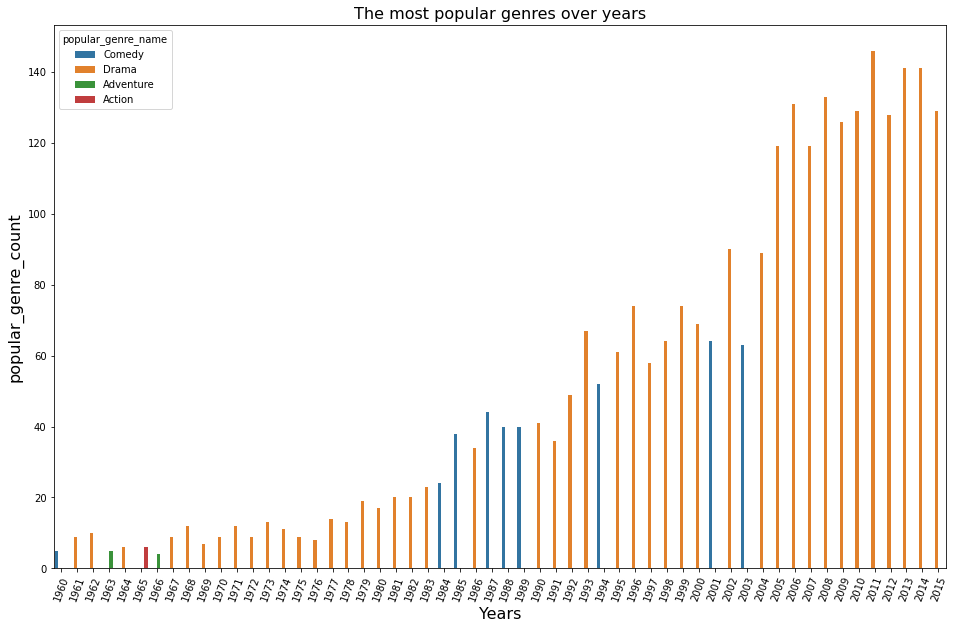

In [31]:
# Here I am using `Years`, `popular_genre_count` and `popular_genre_name` columns to draw bar plot
fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.set_title('The most popular genres over years', fontsize=16)
ax1.set_xlabel('Years', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1 = sns.barplot(x='Years', y='popular_genre_count', hue='popular_genre_name', data=df_q1)
plt.xticks(rotation=70)
plt.show()
sns.despine(fig)

>According to the bar plot above `Drama` genre is the most popular genres over years, whereas you can rarely see some `comedy`, `advanture` and `Action` genre movies winning.

In [32]:
# slicing df_q1 dataframe for pie chart data
df_q1_1 =df_q1.loc[:, 'Action':'TV Movie']
df_q1_1 = df_q1_1.sum(axis = 0)

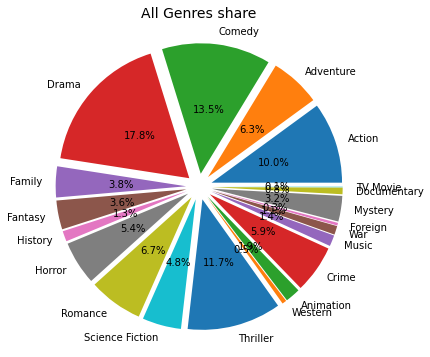

In [33]:
#Using matplotli'sb pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = list(df_q1_1.index.values)
explode = np.full(shape=len(labels), fill_value=0.1, dtype=np.float64)
plt.pie(x=df_q1_1, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5)
plt.title("All Genres share", fontsize=14);
pie.savefig("all_genres.png")

>According to the pie chart above `Drama` genre is the most popular genres, the second is `comedy`, the third place is `Thriller` and follows `Action`, `Adventure` and so on. 

#### To explore all other genres, I decided to draw bar plot by slicing the `df_q1` dataframe within 15 years

In [34]:
# to change the width of barplot
def change_width(ax, new_value) :
        for patch in ax.patches :
            current_width = patch.get_width()
            diff = current_width - new_value
            
            ax.annotate(format(patch.get_height(), '.1f'),
                        (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                        ha='center', va='center',
                        xytext=(0, 7), textcoords='offset points')
            
            # change the bar width
            patch.set_width(new_value)

            # I recenter the bar
            patch.set_x(patch.get_x() + abs(diff))
        

In [35]:
# to draw the bar plot by grouping them yearly
def draw_bar_plot(title, df):
    fig, ax1 = plt.subplots(figsize=(14, 10))
    ax1.set_title(title, fontsize=16)
    ax1.set_xlabel('Years', fontsize=16)
    ax1.set_ylabel('Count', fontsize=16)
    tidy = df.melt(id_vars='Years').rename(columns=str.title)   
    ax1 = sns.barplot(x='Years', y='Value', hue='Variable', data=tidy)
    plt.xticks(rotation=70)
    
    change_width(ax1, .3)
    plt.show()
    sns.despine(fig)

In [36]:
def get_top_three_genres(df):
    for index, row in df.iloc[:, 1:].iterrows():
        n_largest = row.nlargest(2)
        genres_list = list(n_largest.index.values)
        genres_list.append('Years')
        for column in df:
            if (column not in genres_list):
                df[column][index] = None
    return df

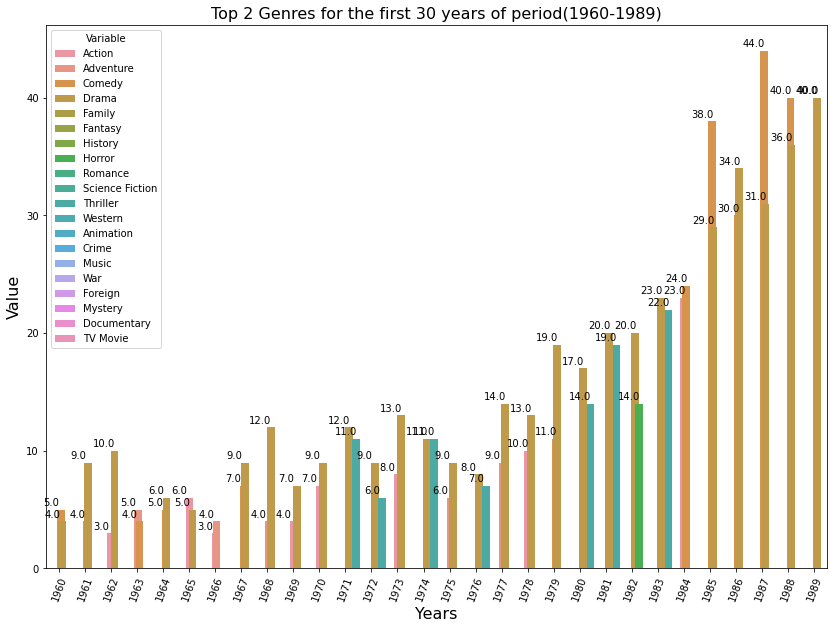

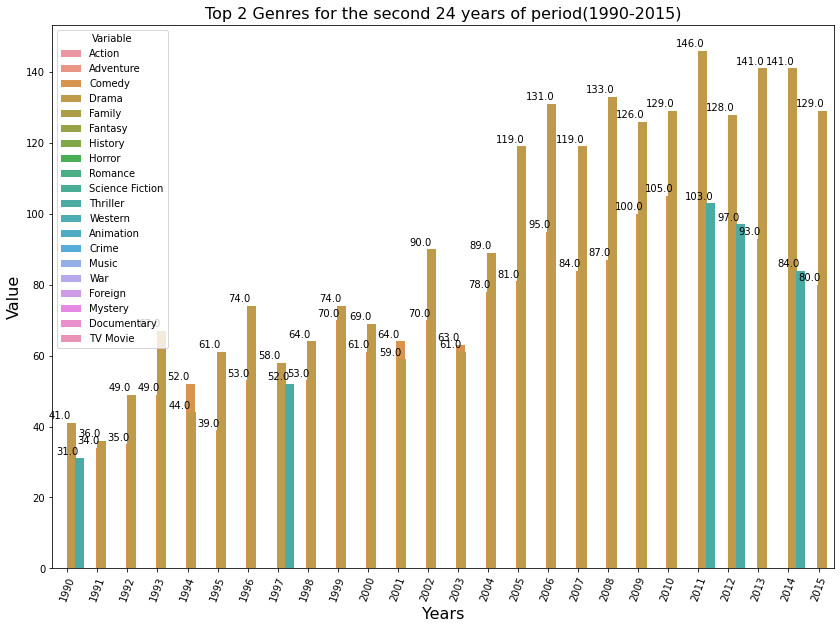

In [37]:
# Bar Plot of all Genres from 1960 to 2015
df_q1_1 = get_top_three_genres(df_q1.iloc[:30, 3:])
draw_bar_plot('Top 2 Genres for the first 30 years of period(1960-1989)', df_q1_1)

df_q1_2 = get_top_three_genres(df_q1.iloc[30:56,3:])
draw_bar_plot('Top 2 Genres for the second 24 years of period(1990-2015)', df_q1_2)


>Above two barplot shows top 2 number of genre from year to year.  
> number of movies created from year to year in all periods have increased considerably. Especially, Drama is increased considerably higher than other genres

<a id='q2'></a>
### Research Question 2  (Q2.What kinds of properties are associated with movies that have high revenues?)

#### Importance of the Research Question 2
>In this research question, I am going to find out which properties are most important to make big profit. 
For example, does investing high amount of budget will be reason to make high revenue? or Does length(runtime) of movie realted? and etc...

> - In the analysis process, firstly, I will find out correlation between continuous number columns. Regression plot of seaborn will be appropriate; 
> - Then I will explore it using Seaborn's heatmap plot 


To answer the question following posts' idea is partially used https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e. None of code is copied!

In [38]:
# to see the highest revenue value
df_q2 = df.sort_values(by ='revenue', ascending=False)
df_q2.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000.0,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [39]:
def plot_correlation(xPlot, YPlot, df, title, isCurrency):
    fig, ax1 = plt.subplots(figsize=(7, 4)) 
    ax1 = sns.regplot(x=xPlot, y=YPlot, data=df);
    ax1.set_title(title, fontsize=16)
    ax1.set(xlim = (min(df[xPlot]),max(df[xPlot])))
    ax1.set(ylim = (min(df[YPlot]),max(df[YPlot])))

    xlabels = ['${:,.2f}'.format(x) + 'B' for x in ax1.get_xticks()/1000000000]
    ticks_loc = ax1.get_xticks().tolist()
    ax1.xaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
    ax1.set_xticklabels(xlabels)
    ax1.xaxis.set_tick_params(which='major', labelcolor='green')
    
    if isCurrency:
        ylabels = ['${:,.2f}'.format(x) + 'B' for x in ax1.get_yticks()/1000000000]
        ticks_loc = ax1.get_yticks().tolist()
        ax1.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
        ax1.set_yticklabels(ylabels)
        ax1.yaxis.set_tick_params(which='major', labelcolor='green',
                             labelleft=True, labelright=False)

    plt.show()

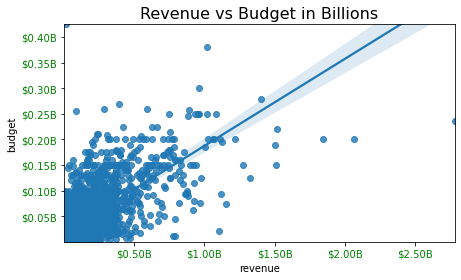

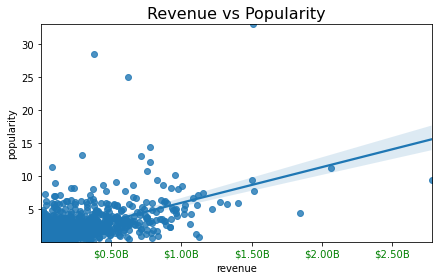

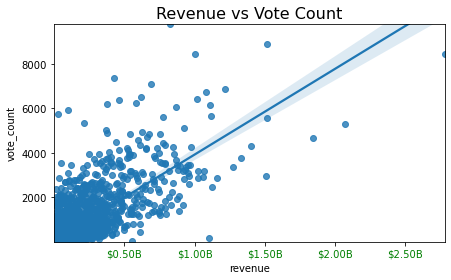

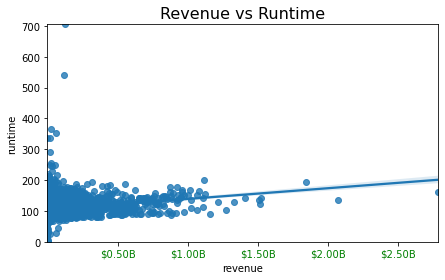

In [40]:
plot_correlation('revenue', 'budget', df_q2, 'Revenue vs Budget in Billions', True);
plot_correlation('revenue', 'popularity', df_q2, 'Revenue vs Popularity', False);
plot_correlation('revenue', 'vote_count', df_q2, 'Revenue vs Vote Count', False);
plot_correlation('revenue', 'runtime', df_q2, 'Revenue vs Runtime', False);

- It seems `Revenue` vs `Budget` and `Revenue` vs `Vote Count` have positive correlation whereas others not much correlated. 
- It seems number of movies that spent more than 200 million dollar `budget` is very scarce.
- It seems  most of the movies doesn't earn more than 4000 `vote_count`.
- It seems `Runtime` doesn't much related to movie's `revenue`

Let's check the following cells with exact numbers.

In [41]:
# to calculate correaltion between continuous numbers
correlations = df_q2.corr()

In [42]:
correlations.iloc[1:, 1:]

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.478008,0.641816,0.188585,0.794867,0.286433,0.145786,0.453438,0.580560
budget,0.478008,1.000000,0.702172,0.242477,0.578710,0.084338,0.197265,0.920227,0.559666
revenue,0.641816,0.702172,1.000000,0.222407,0.773191,0.215797,0.101229,0.679727,0.908316
runtime,0.188585,0.242477,0.222407,1.000000,0.227404,0.304330,-0.102140,0.301063,0.238660
vote_count,0.794867,0.578710,0.773191,0.227404,1.000000,0.335786,0.166422,0.540527,0.682493
vote_average,0.286433,0.084338,0.215797,0.304330,0.335786,1.000000,-0.131538,0.092213,0.252553
release_year,0.145786,0.197265,0.101229,-0.102140,0.166422,-0.131538,1.000000,0.048262,-0.085461
budget_adj,0.453438,0.920227,0.679727,0.301063,0.540527,0.092213,0.048262,1.000000,0.597329
revenue_adj,0.580560,0.559666,0.908316,0.238660,0.682493,0.252553,-0.085461,0.597329,1.000000


Let's look at the `revenue` column from above and discuss:
 - It is the most probable that `spending` high budget resulted high `revenue`. 
 - The second most probable association is `vote_count`. So, if `vote_count` is high, then movie can earn high amount of money. 
 - The third most probable association is `popularity` for `revenue`. So, It can be considered that if the popularit value is high then they earned high revenue
 - `runtime` and `vote_average` doesn't seem to be related to the `revenue`

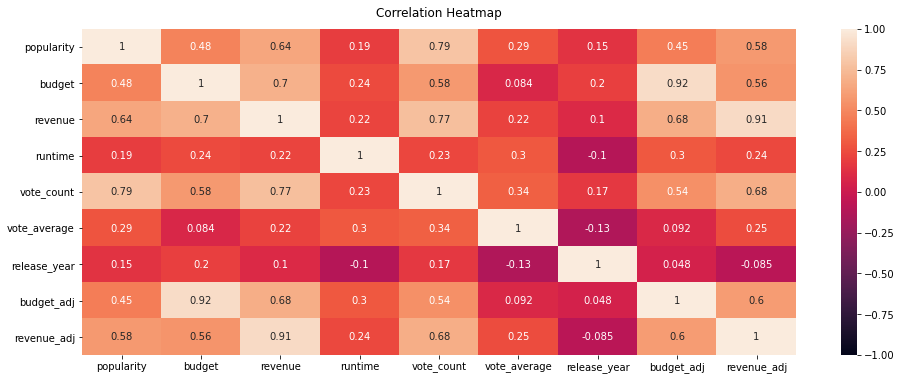

In [43]:
# Code idea is copied from [https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlations.iloc[1:, 1:], vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

<a id='q3'></a>
### Research Question 3 (Q3. Which movies made the most profit, yearly?)

#### Importance of the Research Question 3
> In this research question, I am going to find out movies which made the highest amount of profit from year to year? By doing yearly, I will be able to know top profitable movie types.


In [44]:
df_q3 = pd.DataFrame()
df_q3['profit'] = df['revenue'] - df['budget']
df_q3['year'] = df['release_year']
df_q3['movie_name'] = df['original_title']
df_q3.head()

,profit,year,movie_name
0,1.363529e+09,2015,Jurassic World
1,2.284364e+08,2015,Mad Max: Fury Road
2,1.852382e+08,2015,Insurgent
3,1.868178e+09,2015,Star Wars: The Force Awakens
4,1.316249e+09,2015,Furious 7


In [45]:
# df_q3 = df_q3.groupby(['year'], sort=True)['profit'].max()
idxs = df_q3.groupby(['year'], sort=False)['profit'].transform(max) == df_q3['profit']
df_q3 = df_q3[idxs]
df_q3 = df_q3.sort_values(by='year', ascending=True, na_position='first')
df_q3 = df_q3.reset_index()
df_q3.head(5)

,index,profit,year,movie_name
0,10143,48000000.0,1960,Spartacus
1,10110,211880014.0,1961,One Hundred and One Dalmatians
2,9849,58500000.0,1962,Dr. No
3,10438,76398765.0,1963,From Russia With Love
4,9881,121400000.0,1964,Goldfinger


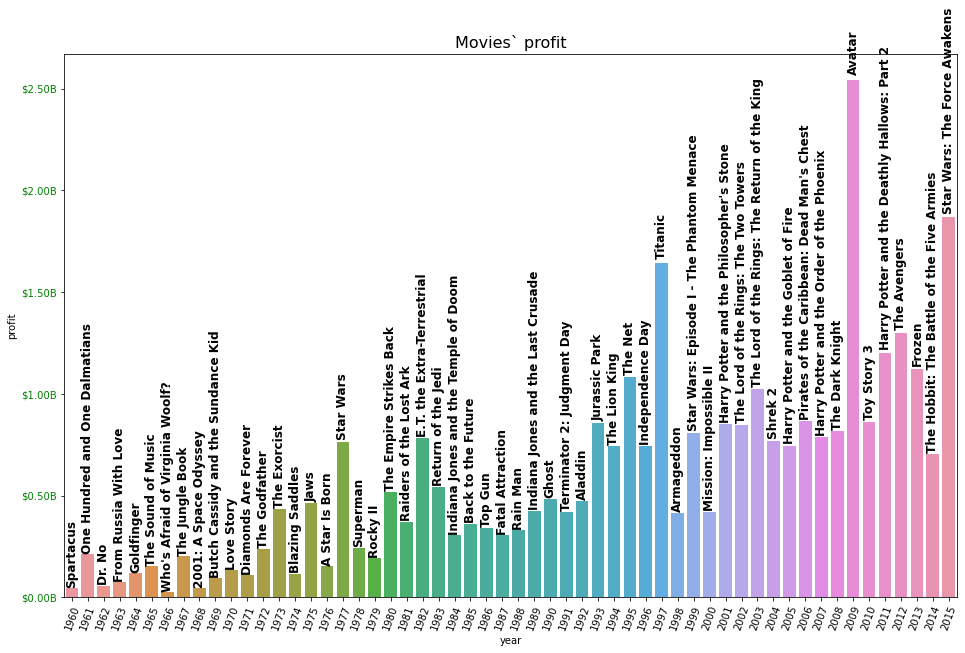

In [46]:
fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.set_title('Movies` profit', fontsize=16)
ax1 = sns.barplot(x='year', y='profit', data=df_q3)
plt.xticks(rotation=70)

ylabels = ['${:,.2f}'.format(x) + 'B' for x in ax1.get_yticks()/1000000000]
ticks_loc = ax1.get_yticks().tolist()
ax1.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax1.set_yticklabels(ylabels)
ax1.yaxis.set_tick_params(which='major', labelcolor='green',
                     labelleft=True, labelright=False)

def autolabel(rects):
    for i in range(0, len(rects)):
        height = rects[i].get_height()        
        ax1.text(rects[i].get_x() + rects[i].get_width() / 2., 
                1.01 * height,
                df_q3.iloc[i]['movie_name'],
                ha='center', va='bottom', rotation=90, color='black', fontdict= { 'fontsize': 12, 'fontweight':'bold'})

autolabel(ax1.patches)
plt.show()

<a id='limitations'></a>
## Analysis Shortcoming & Data Limitations

>  Size of the table:  `(10866 - rows, 21 - columns)`

> Represenatation of samples can be sometimes challenging to prcoess, for example, splitting `genres` by `|` character and transforming each unique value(with its count) to column dataframe can increase time complexity.

> More than half of the data for column `budget` and `revenue` equal to zero, which requires dropping and replacing. For instance, I dropped given the dataframe rows when both of the columns equal to `zero`. However, if one of them is not equal to zero, I took mean for `budget` and for `revenue` equal to zero, I transformed `budget` value.

> I believe, there are many aspects to explore the dataset. However, my solution above should work pretty well for genres, revenue and movies name.

<a id='conclusions'></a>
## Conclusions
Following summarizations I get from three research questions above
 - `Drama` genre movies is the most popular from the below bar plot. However, rarely we can see `comedy` genre movies can beat the `Drama` genre movies.
 - `Action`, `Thriller`, `Romance` genres are the next most made movies  after `Drama`.
 - Overall, there `20` unique genre movies in the dataset
 - Correaltions beetwen revenue and other tables are as following:
     - Correlation beetwen `revenue` and `vote_count` is the highest `val = (0.79)`;
     - The second and third highest corresponds to `budget(0.73)` and `popularity``(0.66)`, respectively;
     - It seems from the given dataset, `runtime(0.16)` and `vote_average(0.17)` properties doesn't associated with revenue.
 - `Avatar` movive made the most profit, followed by `Star Wars: The Force Awakens` and `Titanic`

August 1, 01:29, 2021.  Made by Sanatbek Matlatipov